# Capstone 1 Report

## Preliminaries

### Import packages

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats

### Load dataset

In [169]:
df = pd.read_csv('UCI_Credit_Card.csv')

## Data Wrangling

### SEX
Change values of sex column to 0 & 1

In [170]:
df.SEX.replace({1:0, 2:1}, inplace=True)

### EDUCATION
Change unlabeled data in education to 'Other'

In [171]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

### MARRIAGE
Change unlabeled data in marriage to 'Other'

In [172]:
fil = (df.MARRIAGE == 0)
df.loc[fil, 'MARRIAGE'] = 3

### PAY_0 - PAY_6
Change pay status columns to 0 (payment) or 1 (no payment)

In [173]:
#Repayment status, 9/2005
fil = (df.PAY_0 > 0) 
df.loc[fil, 'PAY_0'] = 1

fil = (df.PAY_0 <= 0) 
df.loc[fil, 'PAY_0'] = 0

#Repayment status, 8/2005
fil = (df.PAY_2 > 0)
df.loc[fil, 'PAY_2'] = 1

fil = (df.PAY_2 <= 0)
df.loc[fil, 'PAY_2'] = 0

#Repayment status, 7/2005
fil = (df.PAY_3 > 0)
df.loc[fil, 'PAY_3'] = 1

fil = (df.PAY_3 <= 0)
df.loc[fil, 'PAY_3'] = 0

#Repayment status, 6/2005
fil = (df.PAY_4 > 0)
df.loc[fil, 'PAY_4'] = 1

fil = (df.PAY_4 <= 0)
df.loc[fil, 'PAY_4'] = 0

#Repayment status, 5/2005
fil = (df.PAY_5 > 0)
df.loc[fil, 'PAY_5'] = 1

fil = (df.PAY_5 <= 0)
df.loc[fil, 'PAY_5'] = 0

#Repayment status, 4/2005
fil = (df.PAY_6 > 0)
df.loc[fil, 'PAY_6'] = 1

fil = (df.PAY_6 <= 0)
df.loc[fil, 'PAY_6'] = 0

## Exploratory Data Analysis

### Default data

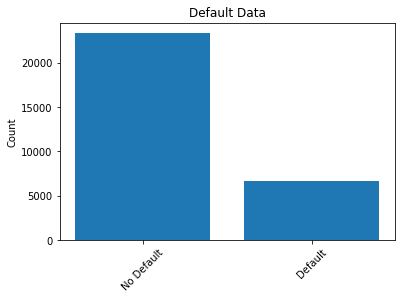

Percentage of total defaults
0.2212


In [103]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['default.payment.next.month'].unique()))

#Describe default.payment.next.month
plt.bar(x,df['default.payment.next.month'].value_counts().sort_index())
plt.ylabel('Count')
plt.xticks(x,('No Default','Default'),rotation=45)
plt.title('Default Data')
plt.show()

#show statistics
print('Percentage of total defaults')
print(df['default.payment.next.month'].mean())

### Balance limit data

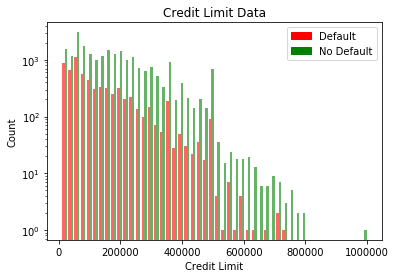

,count,mean,std,min,25%,50%,75%,max
default.payment.next.month,,,,,,,,
0,23364.0,178099.726074,131628.359660,10000.0,70000.0,150000.0,250000.0,1000000.0
1,6636.0,130109.656420,115378.540571,10000.0,50000.0,90000.0,200000.0,740000.0


In [214]:
#define variables for default & no default
default_limit_bal = df[df['default.payment.next.month'] == 1]['LIMIT_BAL']
no_default_limit_bal = df[df['default.payment.next.month'] == 0]['LIMIT_BAL']

#create plot
plt.hist([default_limit_bal, no_default_limit_bal], bins = 50, color = ['red', 'green'],
         alpha = 0.6)

#add lables and change scale
plt.yscale('log')
plt.ylabel('Count')
plt.xlabel('Credit Limit')
plt.title('Credit Limit Data')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

plt.show()

#show summary statistics
df.groupby('default.payment.next.month')['LIMIT_BAL'].describe()

### Sex data

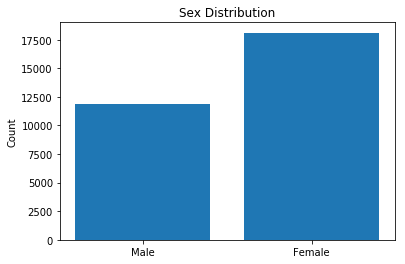

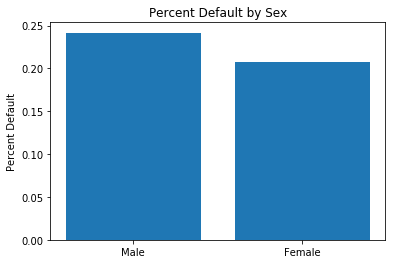

In [180]:
#plot counts of male & female clients
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['SEX'].unique()))

#Describe SEX using a bar plot to count the number of males and females
plt.bar(x,df['SEX'].value_counts().sort_index())

#label the axes and add title
plt.ylabel('Count')
plt.xticks(x,('Male','Female'))
plt.title('Sex Distribution')

#show plot
plt.show()

#plot default by sex
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['SEX'].unique()))

#calculate the default mean for each sex and store in a variable
defaults_by_sex=df.groupby(['SEX'])[['default.payment.next.month']].mean()

#Create the barplot
plt.bar(x,defaults_by_sex['default.payment.next.month'])

#label the axes and add title
plt.ylabel('Percent Default')
plt.xticks(x,('Male','Female'))
plt.title('Percent Default by Sex')

#show plot
plt.show()

### Education data

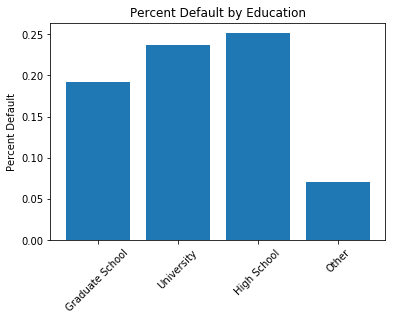

In [106]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['EDUCATION'].unique()))

#count the number of defaults for each level of education and store in a variable
defaults_by_education=df.groupby(['EDUCATION'])[['default.payment.next.month']].mean()

#Make bar plot of default mean for each class of education
plt.bar(x,defaults_by_education['default.payment.next.month'])

#label axes and add title
plt.ylabel('Percent Default')
plt.xticks(x,('Graduate School','University','High School','Other'),rotation=45)
plt.title('Percent Default by Education')

#show plot
plt.show()

### Marriage data

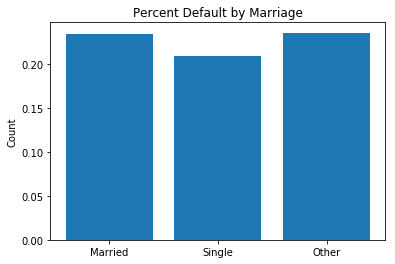

In [107]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['MARRIAGE'].unique()))

#count the number of defaults for each level of education and store in a variable
average_defaults_by_marriage=df.groupby(['MARRIAGE'])[['default.payment.next.month']].mean()

#make barplot of default mean by marriage
plt.bar(x,average_defaults_by_marriage['default.payment.next.month'])

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Married','Single','Other'))
plt.title('Percent Default by Marriage')

#show plot
plt.show()

### Age data

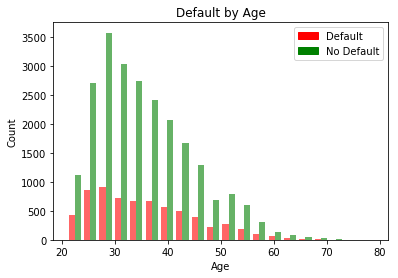

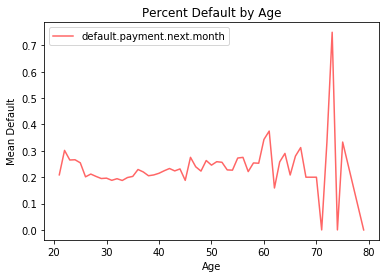

In [215]:
#define variables for default & no default
default_age = df[df['default.payment.next.month'] == 1]['AGE']
no_default_age = df[df['default.payment.next.month'] == 0]['AGE']

#Make historgram of age
plt.hist([default_age, no_default_age], bins = 20, color = ['red', 'green'],
        alpha = 0.6)

#add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Default by Age')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#mean default by age
default_by_age=pd.DataFrame(df.groupby(['AGE'])['default.payment.next.month'].mean())
default_by_age.plot(title='average default by age', color = 'red', alpha = 0.6)
plt.ylabel('Mean Default')
plt.xlabel('Age')
plt.title('Percent Default by Age')
plt.show()

### Pay data (September, 2005)
#### Pay Status

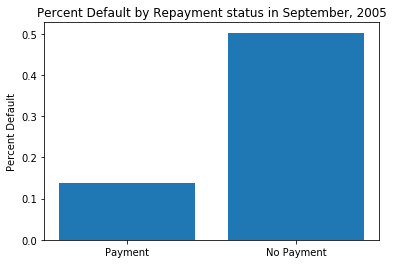

In [182]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_0'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status1 = df.groupby(['PAY_0'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 9/2005
plt.bar(x,defaults_by_pay_status1['default.payment.next.month'])

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in September, 2005')

#show plot
plt.show()

#### Bill Amount

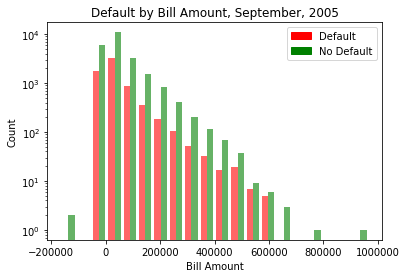

In [216]:
#define variables for default & no default
default_bill_amt1 = df[df['default.payment.next.month'] == 1]['BILL_AMT1']
no_default_bill_amt1 = df[df['default.payment.next.month'] == 0]['BILL_AMT1']

#make histogram of bill amounts for 9/2005
plt.hist([default_bill_amt1, no_default_bill_amt1],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, September, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

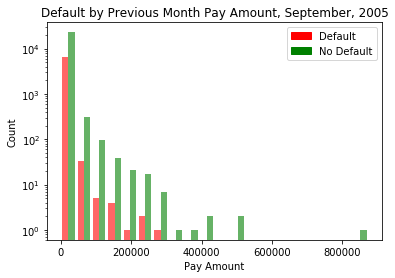

In [217]:
#define variables for default & no default
default_pay_amt1 = df[df['default.payment.next.month'] == 1]['PAY_AMT1']
no_default_pay_amt1 = df[df['default.payment.next.month'] == 0]['PAY_AMT1']

#make histogram of previous month pay amounts for 9/2005
plt.hist([default_pay_amt1, no_default_pay_amt1],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, September, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (August, 2005)
#### Pay Status

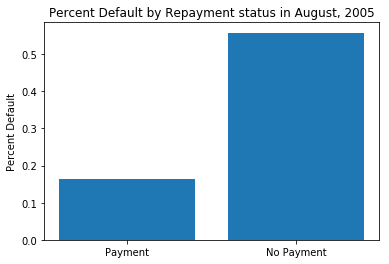

In [183]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_2'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status2=df.groupby(['PAY_2'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 8/2005
plt.bar(x,defaults_by_pay_status2['default.payment.next.month'])

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in August, 2005')

#show plot
plt.show()

#### Bill Amount

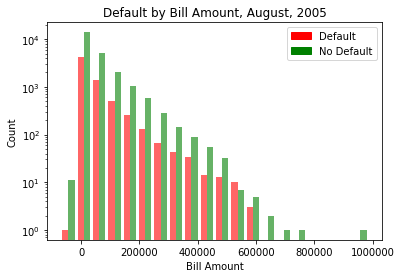

In [218]:
#define variables for default & no default
default_bill_amt2 = df[df['default.payment.next.month'] == 1]['BILL_AMT2']
no_default_bill_amt2 = df[df['default.payment.next.month'] == 0]['BILL_AMT2']

#make histogram of bill amounts for 8/2005
plt.hist([default_bill_amt2, no_default_bill_amt2],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, August, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

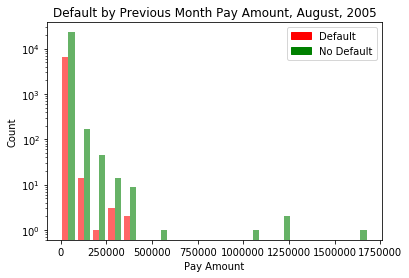

In [219]:
#define variables for default & no default
default_pay_amt2 = df[df['default.payment.next.month'] == 1]['PAY_AMT2']
no_default_pay_amt2 = df[df['default.payment.next.month'] == 0]['PAY_AMT2']

#make histogram of previous month pay amounts for 8/2005
plt.hist([default_pay_amt2, no_default_pay_amt2],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, August, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (July, 2005)
#### Pay Status

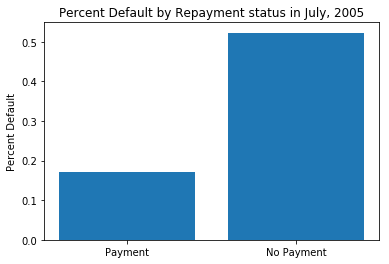

In [185]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_3'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status3=df.groupby(['PAY_3'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 7/2005
plt.bar(x,defaults_by_pay_status3['default.payment.next.month'])

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in July, 2005')

#show plot
plt.show()

#### Bill Amount

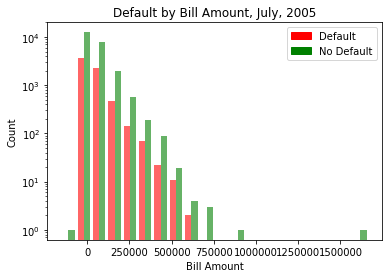

In [220]:
#define variables for default & no default
default_bill_amt3 = df[df['default.payment.next.month'] == 1]['BILL_AMT3']
no_default_bill_amt3 = df[df['default.payment.next.month'] == 0]['BILL_AMT3']

#make histogram of bill amounts for 7/2005
plt.hist([default_bill_amt3, no_default_bill_amt3],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, July, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

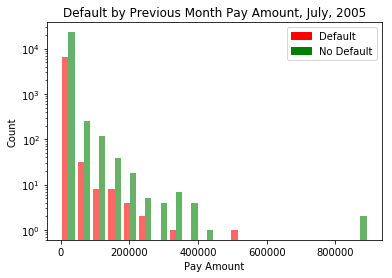

In [221]:
#define variables for default & no default
default_pay_amt3 = df[df['default.payment.next.month'] == 1]['PAY_AMT3']
no_default_pay_amt3 = df[df['default.payment.next.month'] == 0]['PAY_AMT3']

#make histogram of previous month pay amounts for 7/2005
plt.hist([default_pay_amt3, no_default_pay_amt3],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, July, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (June, 2005)
#### Pay Status

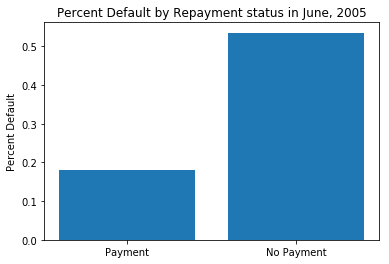

In [187]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_4'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status4=df.groupby(['PAY_4'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 6/2005
plt.bar(x,defaults_by_pay_status4['default.payment.next.month'])

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in June, 2005')

#show plot
plt.show()

#### Bill Amount

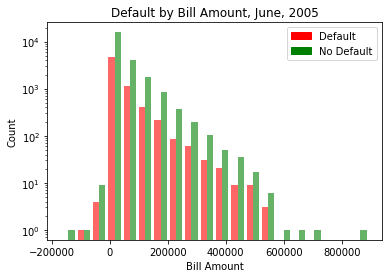

In [222]:
#define variables for default & no default
default_bill_amt4 = df[df['default.payment.next.month'] == 1]['BILL_AMT4']
no_default_bill_amt4 = df[df['default.payment.next.month'] == 0]['BILL_AMT4']

#make histogram of bill amounts for 6/2005
plt.hist([default_bill_amt4, no_default_bill_amt4],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, June, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

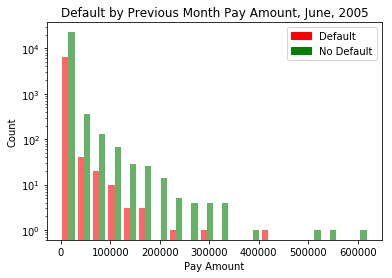

In [223]:
#define variables for default & no default
default_pay_amt4 = df[df['default.payment.next.month'] == 1]['PAY_AMT4']
no_default_pay_amt4 = df[df['default.payment.next.month'] == 0]['PAY_AMT4']

#make histogram of previous month pay amounts for 6/2005
plt.hist([default_pay_amt4, no_default_pay_amt4],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, June, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (May, 2005)
#### Pay Status

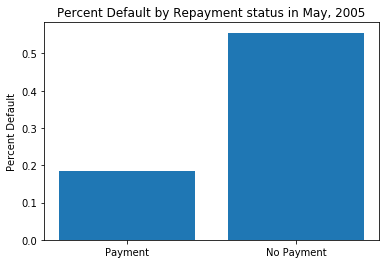

In [189]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_5'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status5=df.groupby(['PAY_5'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 5/2005
plt.bar(x,defaults_by_pay_status5['default.payment.next.month'])

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in May, 2005')

#show plot
plt.show()

#### Bill Amount

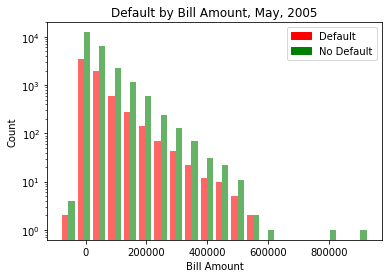

In [224]:
#define variables for default & no default
default_bill_amt5 = df[df['default.payment.next.month'] == 1]['BILL_AMT5']
no_default_bill_amt5 = df[df['default.payment.next.month'] == 0]['BILL_AMT5']

#make histogram of bill amounts for 5/2005
plt.hist([default_bill_amt5, no_default_bill_amt5],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, May, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

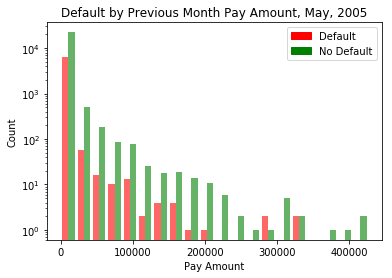

In [225]:
#define variables for default & no default
default_pay_amt5 = df[df['default.payment.next.month'] == 1]['PAY_AMT5']
no_default_pay_amt5 = df[df['default.payment.next.month'] == 0]['PAY_AMT5']

#make histogram of previous month pay amounts for 5/2005
plt.hist([default_pay_amt5, no_default_pay_amt5],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, May, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

### Pay data (April, 2005)
#### Pay Status

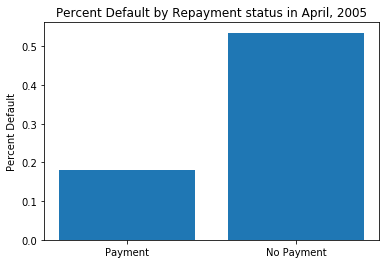

In [191]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_6'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status6=df.groupby(['PAY_6'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 4/2005
plt.bar(x,defaults_by_pay_status4['default.payment.next.month'])

#add labels and title
plt.ylabel('Percent Default')
plt.xticks(x,('Payment','No Payment'))
plt.title('Percent Default by Repayment status in April, 2005')

#show plot
plt.show()

#### Bill Amount

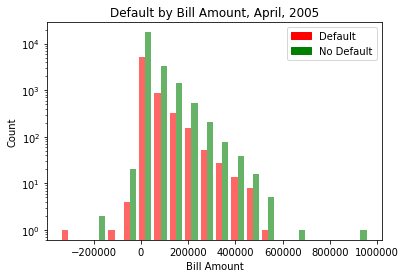

In [226]:
#define variables for default & no default
default_bill_amt6 = df[df['default.payment.next.month'] == 1]['BILL_AMT6']
no_default_bill_amt6 = df[df['default.payment.next.month'] == 0]['BILL_AMT6']

#make histogram of bill amounts for 4/2005
plt.hist([default_bill_amt6, no_default_bill_amt6],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Default by Bill Amount, April, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

#### Pay Amount

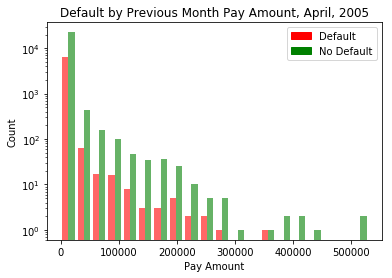

In [227]:
#define variables for default & no default
default_pay_amt6 = df[df['default.payment.next.month'] == 1]['PAY_AMT6']
no_default_pay_amt6 = df[df['default.payment.next.month'] == 0]['PAY_AMT6']

#make histogram of previous month pay amounts for 4/2005
plt.hist([default_pay_amt6, no_default_pay_amt6],bins=20, color = ['red', 'green'],
        alpha = 0.6)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Pay Amount')
plt.ylabel('Count')
plt.title('Default by Previous Month Pay Amount, April, 2005')

#add legend
red_patch = mpatches.Patch(color='red', label='Default')
green_patch = mpatches.Patch(color = 'green', label = 'No Default')
plt.legend(handles=[red_patch, green_patch])

#show plot
plt.show()

## Data Modeling

In [153]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Define PIF (paid in full) columns

In [127]:
#define columns names
#Note: can't define for September/1 because there is no pay data for October
PIF_cols = ['PIF_2', 'PIF_3', 'PIF_4', 'PIF_5', 'PIF_6']
PAY_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']
BILL_cols = ['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

for pif, i in zip(PIF_cols, np.arange(0,5)):
    df[pif] = (df[PAY_cols[i]] >= df[BILL_cols[i]])

Drop clients who closed their accounts

In [128]:
#filter customers who closed their account to drop from the dataset
closed = df[(df['default.payment.next.month'] == 1) & (df['PIF_2'] == 1)]

df = df.drop(closed.index)

### Split categorical columns

In [129]:
#set intercept column (for logit regrssion)
df['intercept'] = 1

#create dummy variable columns for categorical variables
df[['MARRIED','SINGLE','OTHER']] =  pd.get_dummies(df['MARRIAGE'])
df[['GRADUATE_SCHOOL','UNIVERSITY','HIGH_SCHOOL','OTHERS']] =  pd.get_dummies(df['EDUCATION'])

#drop others columns
df = df.drop(['OTHER', 'OTHERS'], axis = 1)

### Correlation Heatmap

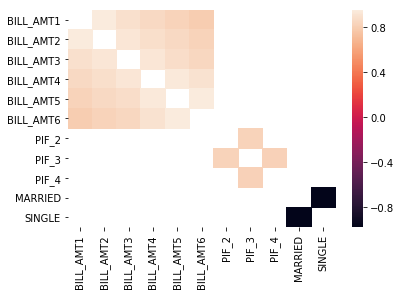

In [130]:
#remove categorical columns from dataset for heatmap
heatmap_data = df.drop(['ID','EDUCATION','MARRIAGE','intercept'], axis = 1)

#create covariance matrix
heatmap_correlation = heatmap_data.corr()

#create filter to view which columns are highly correlated
#we also have to filter out the diagonal where all values are 1
fil = (abs(heatmap_correlation) > 0.8) & (heatmap_correlation !=1)

#filter the correlation matrix
fil = heatmap_correlation[fil]

#drop rows with all NaN values (correlation < 0.8)
fil = fil.dropna(how = 'all')

#drop columns with all NaN values
fil = fil.dropna(how = 'all', axis = 1)

#generate heatmap
sns.heatmap(fil)

#show plot
plt.show()

### Train Test Split

Import packages

In [143]:
#set dependent variable to default.payment.next.month
y = df['default.payment.next.month'].copy()

#set independent varaible to remaining columns (features)
features = ['LIMIT_BAL', 'SEX', 'GRADUATE_SCHOOL','UNIVERSITY','HIGH_SCHOOL',
            'MARRIED','SINGLE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
            'PAY_5', 'PAY_6', 'PIF_2', 'PIF_3', 'PIF_4', 'PIF_5', 'PIF_6']

X = df[features].copy()

#split the dataset into testing and training using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Tuning

In [155]:
parameters = {'max_depth': np.linspace(3, 10, 8, dtype = int),
          'n_estimators': np.linspace(30, 200, 18, dtype = int)}

scorer = make_scorer(recall_score)

grid = GridSearchCV(RandomForestClassifier(class_weight = 'balanced', random_state = 42),
                    parameters, scorer, cv=5, return_train_score = True)

grid = grid.fit(X_train, y_train)

In [166]:
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

Best score: 0.6992917143893758
Best parameters: {'max_depth': 6, 'n_estimators': 30}


In [157]:
results = pd.DataFrame(grid.cv_results_)

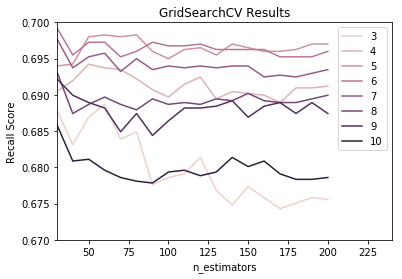

In [163]:
#create figure
plt.figure()

#set title
plt.title('GridSearchCV Results')

#create plot object
ax = plt.gca()

#set x & y limits based on data in results dataframe
ax.set_xlim(30, 240)
ax.set_ylim(0.67, 0.7)

#create plot with results data
sns.lineplot('param_n_estimators', 'mean_test_score', data = results,
            hue = results.param_max_depth.tolist(), legend = 'full',
            ci = 'std_test_score', err_style = 'band')

#label axes
plt.xlabel('n_estimators')
plt.ylabel('Recall Score')

#show plot
plt.show()

In [164]:
#create the classifier
clf = RandomForestClassifier(n_estimators = 30, max_depth = 6, random_state = 42,
                            class_weight = 'balanced')

#fit classifier to training set (with all defaults)
clf = clf.fit(X_train, y_train)

#run prediction on test set
prd = clf.predict(X_test)

#check recall
print('Recall score:', recall_score(y_true = y_test, y_pred = prd))

#show confusion matrix
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = prd))

Recall score: 0.7020408163265306


,0,1
0,4033,649
1,292,688


In [165]:
imp = clf.feature_importances_.tolist()
imp_df = pd.DataFrame({'feature': features, 'score': imp})
imp_df.sort_values(by='score', ascending = False)

,feature,score
14,PIF_2,0.274671
8,PAY_0,0.183614
9,PAY_2,0.175227
10,PAY_3,0.065750
11,PAY_4,0.062222
15,PIF_3,0.049585
12,PAY_5,0.041277
16,PIF_4,0.036158
0,LIMIT_BAL,0.034948
13,PAY_6,0.029228


In [199]:
parameters = {'max_depth': np.linspace(3, 10, 8, dtype = int),
          'n_estimators': np.linspace(15, 35, 21, dtype = int)}

scorer = make_scorer(recall_score)

grid = GridSearchCV(RandomForestClassifier(class_weight = 'balanced', random_state = 42),
                    parameters, scorer, cv=5, return_train_score = True)

grid = grid.fit(X_train, y_train)

In [200]:
print('Best score:', grid.best_score_)
print('Best parameters:', grid.best_params_)

Best score: 0.7146832910272478
Best parameters: {'max_depth': 7, 'n_estimators': 16}


In [201]:
results = pd.DataFrame(grid.cv_results_)

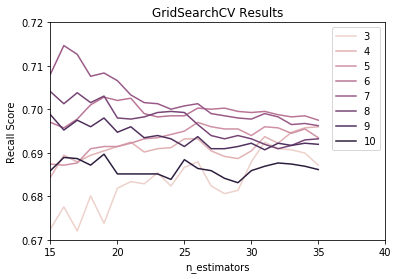

In [207]:
#create figure
plt.figure()

#set title
plt.title('GridSearchCV Results')

#create plot object
ax = plt.gca()

#set x & y limits based on data in results dataframe
ax.set_xlim(15, 40)
ax.set_ylim(0.67, 0.72)

#create plot with results data
sns.lineplot('param_n_estimators', 'mean_test_score', data = results,
            hue = results.param_max_depth.tolist(), legend = 'full',
            ci = 'std_test_score', err_style = 'band')

#label axes
plt.xlabel('n_estimators')
plt.ylabel('Recall Score')

#show plot
plt.show()

In [208]:
#create the classifier
clf = RandomForestClassifier(n_estimators = 16, max_depth = 7, random_state = 42,
                            class_weight = 'balanced')

#fit classifier to training set (with all defaults)
clf = clf.fit(X_train, y_train)

#run prediction on test set
prd = clf.predict(X_test)

#check recall
print('Recall score:', recall_score(y_true = y_test, y_pred = prd))

#show confusion matrix
pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = prd))

Recall score: 0.7193877551020408


,0,1
0,3973,709
1,275,705


In [209]:
imp = clf.feature_importances_.tolist()
imp_df = pd.DataFrame({'feature': features, 'score': imp})
imp_df.sort_values(by='score', ascending = False)

,feature,score
14,PIF_2,0.273711
8,PAY_0,0.225856
9,PAY_2,0.108314
10,PAY_3,0.076283
11,PAY_4,0.067449
0,LIMIT_BAL,0.055806
12,PAY_5,0.045125
15,PIF_3,0.044115
17,PIF_5,0.028379
13,PAY_6,0.025130
